<a href="https://colab.research.google.com/github/SaqlainHussainShah/Image-classificaiton/blob/master/Classification_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from PIL import Image
import json 
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path='/content/drive/My Drive/gen_img_data.json'


In [0]:
with open(path, 'r') as f:
  datastore = json.load(f)

In [5]:
print(len(datastore))

23702


In [0]:
def get_values_class(json_data):
  labels=[]
  pixel_values=[]
  
  for i in range(len(json_data)):
    
    for name, value in json_data[i].items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
      labels.append(name)
      # print(name)

      for name, value in value.items():
        pixel_values.append(value)
        # print(len(value))
        # print(value)

  return (pixel_values, labels)

In [0]:
X,y=get_values_class(datastore)

In [142]:
type(X)

list

In [143]:
type(y)

list

In [0]:
df=pd.DataFrame(list(zip(X,y)),columns =['X', 'labels'])

In [151]:
df.head()

,X,labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ankle boot
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Sandal
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Sandal
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39,...",Ankle boot
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Sandal


In [0]:
df['X'][0]=np.asarray(df['X'][0]).reshape((28,28)).astype('float32')

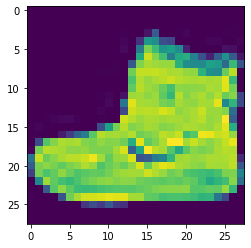

In [153]:
plt.imshow(df['X'][0])

In [0]:
X_data = []

for i in range(len(df['X'])):
  
  image=df['X'][i]
  image=np.asarray(image)

  if image.shape[0]==1024:
    # image.shape=(32,32)
    df['X'][i] = image.reshape((32,32)).astype('float32')
    # image = cv2.resize(image, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

  elif image.shape[0]==784:

    image = image.reshape((28,28)).astype('float32')

    df['X'][i] =  cv2.resize(image, dsize=(32,32), interpolation=cv2.INTER_CUBIC)

    # image = image.reshape((28,28)).astype('float32')

    # image.shape=(28,28)

  # X_data[i]=image
  

In [155]:
df.head()

,X,labels
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Ankle boot
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Sandal
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Sandal
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Ankle boot
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Sandal


In [156]:
df['X'][0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,
          1.,   3.,   4.,   0.,   0.,   3.],
       [  0.,   0.,   0.,   0.,   0

In [0]:
# df['X']=df['X'].astype('float32')
df['X']=np.array(df['X'].tolist())

In [0]:
# for i in range(len(df['X'])):
#   image=df['X'][i]
#   name=str(i)+'.png'
#   cv2.imwrite(name,image)

In [0]:
import cv2
import glob
images = np.asarray([cv2.imread(file) for file in glob.glob('/content/*.png')])

In [0]:
image_np_array=np.zeros((len(images),32,32,3),dtype=float)

In [253]:
image_np_array.shape

(23702, 32, 32, 3)

In [254]:
images[1].shape[2]

3

In [255]:
images[1][20][12][1]

182

In [0]:
for i in range(len(images)):

  for x in range(images[i].shape[0]):
    for y in range(images[i].shape[1]):
      for z in range(images[i].shape[2]):
        image_np_array[i][x][y][z]=images[i][x][y][z]

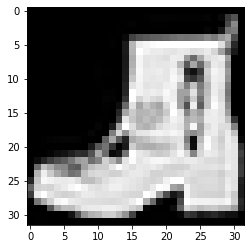

In [265]:
plt.imshow(images[60])

In [260]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['labels'])

LabelEncoder()

In [0]:
y_transform=le.transform(df['labels'])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
trainX, testX, trainY, testY = train_test_split(image_np_array,y_transform, test_size=0.2, random_state=42)

In [304]:
trainX.shape

(18961, 32, 32, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout

In [0]:
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3)))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(1, activation='softmax'))

In [307]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)             

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [316]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY))

Train on 18961 samples, validate on 4741 samples
Epoch 1/10
18961/18961 [==============================] - 3s 168us/step - loss: nan - acc: 0.2551 - val_loss: nan - val_acc: 0.2453
Epoch 2/10
18961/18961 [==============================] - 3s 144us/step - loss: nan - acc: 0.2551 - val_loss: nan - val_acc: 0.2453
Epoch 3/10
18961/18961 [==============================] - 3s 140us/step - loss: nan - acc: 0.2551 - val_loss: nan - val_acc: 0.2453
Epoch 4/10
18961/18961 [==============================] - 3s 143us/step - loss: nan - acc: 0.2551 - val_loss: nan - val_acc: 0.2453
Epoch 5/10
18961/18961 [==============================] - 3s 140us/step - loss: nan - acc: 0.2551 - val_loss: nan - val_acc: 0.2453
Epoch 6/10
18961/18961 [==============================] - 3s 138us/step - loss: nan - acc: 0.2551 - val_loss: nan - val_acc: 0.2453
Epoch 7/10
18961/18961 [==============================] - 3s 139us/step - loss: nan - acc: 0.2551 - val_loss: nan - val_acc: 0.2453
Epoch 8/10
18961/18961 [===